In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

file_path ="D://2024S-T2 BDM 2203 - Big Data Visualization for Business Communications 01//Final_Project//Vic_Road_Crash_Data.csv" # path to your dataset

df = pd.read_csv(file_path)

# Converting the  date and time columns to datetime format
df['ACCIDENT_DATE'] = pd.to_datetime(df['ACCIDENT_DATE'], format='%d/%m/%Y')
df['ACCIDENT_TIME'] = pd.to_datetime(df['ACCIDENT_TIME'], format='%H:%M:%S').dt.time

# Adding additional time-based features
df['Year'] = df['ACCIDENT_DATE'].dt.year
df['Month'] = df['ACCIDENT_DATE'].dt.month
df['Hour'] = pd.to_datetime(df['ACCIDENT_TIME'].astype(str)).dt.hour



In [42]:
df.head(20)

,ACCIDENT_NO,ACCIDENT_DATE,ACCIDENT_TIME,ACCIDENT_TYPE,ACCIDENT_TYPE_DESC,DAY_OF_WEEK,DAY_WEEK_DESC,DCA_CODE,DCA_DESC,LIGHT_CONDITION,...,Hour,HOUR,DAY_NIGHT,WEEKEND,TIME_OF_DAY,LIGHT_ROAD_INTERACTION,SPEED_ACCIDENT_INTERACTION,SEVERITY_BINARY,PROXIMITY_TO_INTERSECTION,URBAN_RURAL
0,T20120000060,2012-01-01,19:40:00,6,Vehicle overturned (no collision),1,Sunday,184,OUT OF CONTROL ON CARRIAGEWAY (ON BEND),1,...,19,19,Night,1,Evening,1_T intersection,60_Vehicle overturned (no collision),0,1,Rural
1,T20120000028,2012-01-01,04:00:00,4,Collision with a fixed object,1,Sunday,183,OFF LEFT BEND INTO OBJECT/PARKED VEHICLE,5,...,4,4,Night,1,Night,5_T intersection,100_Collision with a fixed object,0,1,Rural
2,T20120000021,2012-01-01,07:30:00,4,Collision with a fixed object,1,Sunday,171,LEFT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICLE,1,...,7,7,Day,1,Morning,1_Not at intersection,50_Collision with a fixed object,1,1,Rural
3,T20120000056,2012-01-01,16:15:00,4,Collision with a fixed object,1,Sunday,183,OFF LEFT BEND INTO OBJECT/PARKED VEHICLE,1,...,16,16,Day,1,Afternoon,1_T intersection,100_Collision with a fixed object,0,1,Rural
4,T20120000018,2012-01-01,05:15:00,4,Collision with a fixed object,1,Sunday,173,RIGHT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICLE,5,...,5,5,Night,1,Morning,5_Cross intersection,100_Collision with a fixed object,1,1,Urban
5,T20120000013,2012-01-01,03:35:00,1,Collision with vehicle,1,Sunday,160,VEHICLE COLLIDES WITH VEHICLE PARKED ON LEFT O...,3,...,3,3,Night,1,Night,3_T intersection,60_Collision with vehicle,0,1,Urban
6,T20120000012,2012-01-01,02:00:00,1,Collision with vehicle,1,Sunday,110,CROSS TRAFFIC(INTERSECTIONS ONLY),3,...,2,2,Night,1,Night,3_Cross intersection,80_Collision with vehicle,0,1,Urban
7,T20120000054,2012-01-01,18:20:00,1,Collision with vehicle,1,Sunday,116,LEFT NEAR (INTERSECTIONS ONLY),1,...,18,18,Night,1,Evening,1_Cross intersection,80_Collision with vehicle,0,1,Urban
8,T20120000450,2012-01-01,16:55:00,1,Collision with vehicle,1,Sunday,130,REAR END(VEHICLES IN SAME LANE),1,...,16,16,Day,1,Afternoon,1_Not at intersection,70_Collision with vehicle,0,1,Urban
9,T20120000053,2012-01-01,16:50:00,1,Collision with vehicle,1,Sunday,121,RIGHT THROUGH,1,...,16,16,Day,1,Afternoon,1_T intersection,80_Collision with vehicle,0,1,Urban


In [40]:
df.describe()

,ACCIDENT_DATE,ACCIDENT_TYPE,DAY_OF_WEEK,DCA_CODE,LIGHT_CONDITION,NODE_ID,SEVERITY,SPEED_ZONE,Year,Month,Hour,HOUR,WEEKEND,SEVERITY_BINARY,PROXIMITY_TO_INTERSECTION
count,152445,152445.000000,152445.000000,152445.000000,152445.000000,152445.000000,152445.000000,152445.000000,152445.000000,152445.000000,152445.000000,152445.000000,152445.000000,152445.000000,152445.000000
mean,2017-10-23 19:45:17.268523264,2.107980,3.888727,138.135826,1.828745,304940.779888,2.593407,67.038834,2017.324957,6.370953,13.260094,13.260094,0.255338,0.610404,0.997606
min,2012-01-01 00:00:00,1.000000,0.000000,100.000000,1.000000,4.000000,1.000000,30.000000,2012.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2014-11-28 00:00:00,1.000000,2.000000,120.000000,1.000000,49775.000000,2.000000,60.000000,2014.000000,3.000000,9.000000,9.000000,0.000000,0.000000,1.000000
50%,2017-08-24 00:00:00,1.000000,4.000000,130.000000,1.000000,278386.000000,3.000000,60.000000,2017.000000,6.000000,14.000000,14.000000,0.000000,1.000000,1.000000
75%,2020-11-13 00:00:00,3.000000,6.000000,167.000000,2.000000,358189.000000,3.000000,80.000000,2020.000000,9.000000,17.000000,17.000000,1.000000,1.000000,1.000000
max,2023-09-30 00:00:00,9.000000,7.000000,199.000000,9.000000,800990.000000,4.000000,100.000000,2023.000000,12.000000,23.000000,23.000000,1.000000,1.000000,1.000000
std,NaN,1.880543,1.983988,25.813233,1.538316,251440.025570,0.524761,17.853081,3.411987,3.442590,5.124715,5.124715,0.436052,0.487660,0.048873


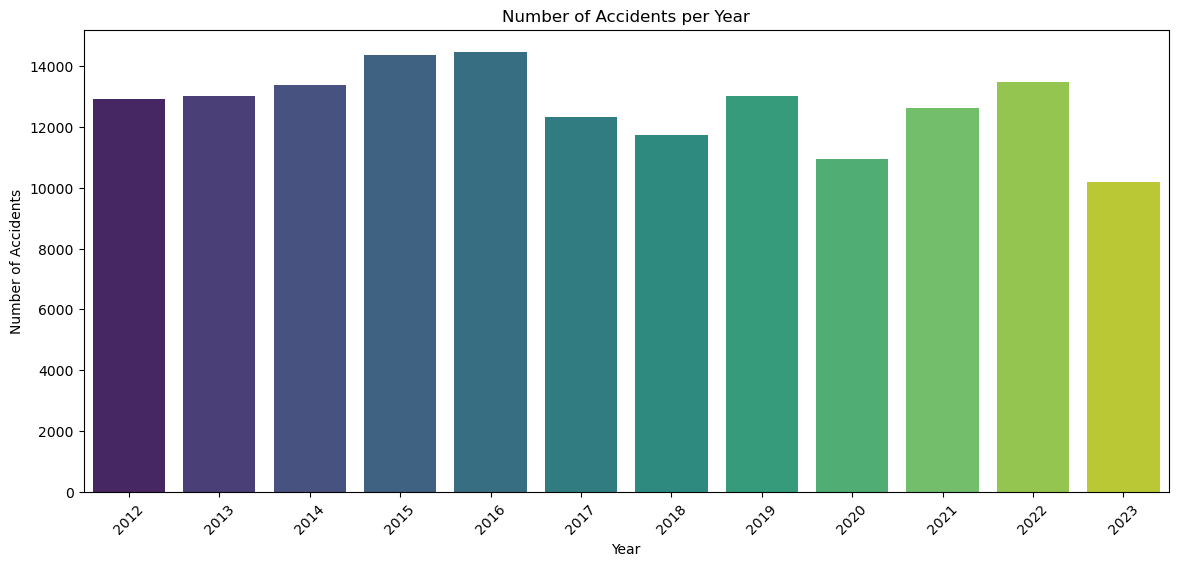

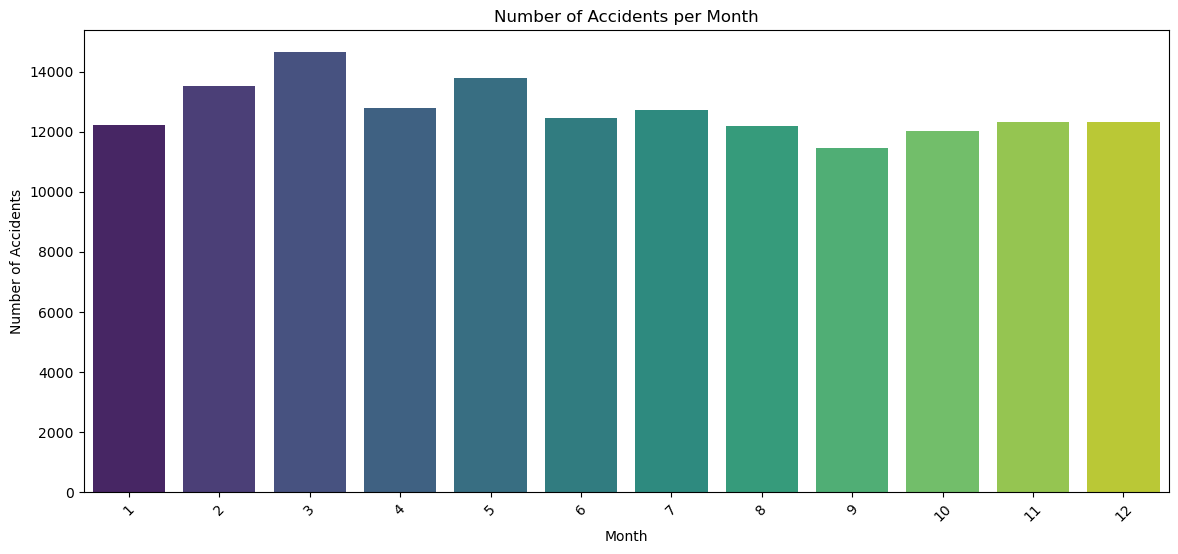

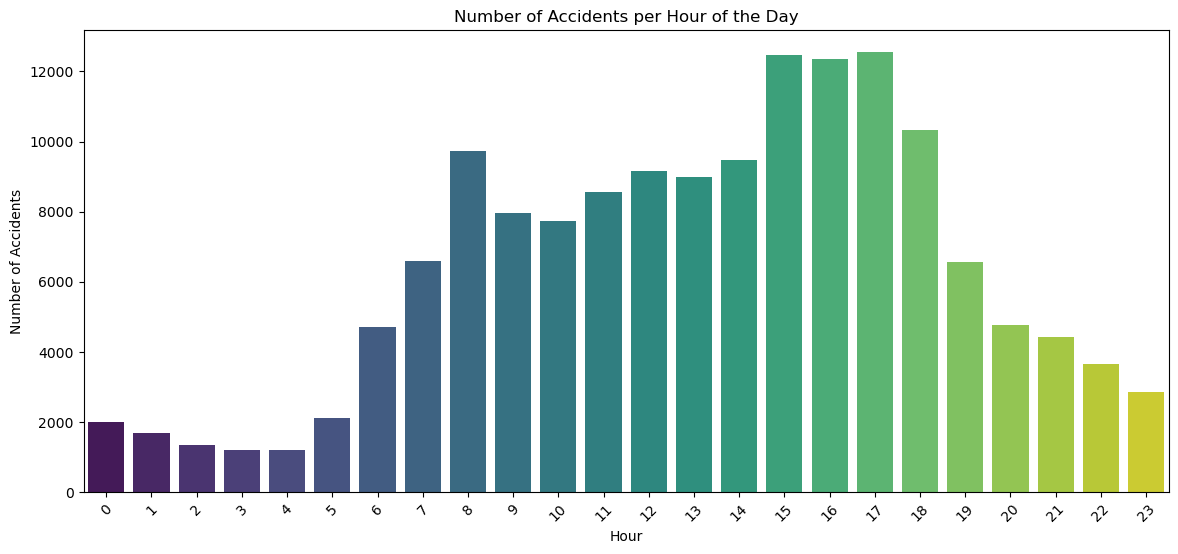

In [12]:
# Accident Trends Over Time
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='Year', palette='viridis')
plt.title('Number of Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='Month', palette='viridis')
plt.title('Number of Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='Hour', palette='viridis')
plt.title('Number of Accidents per Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


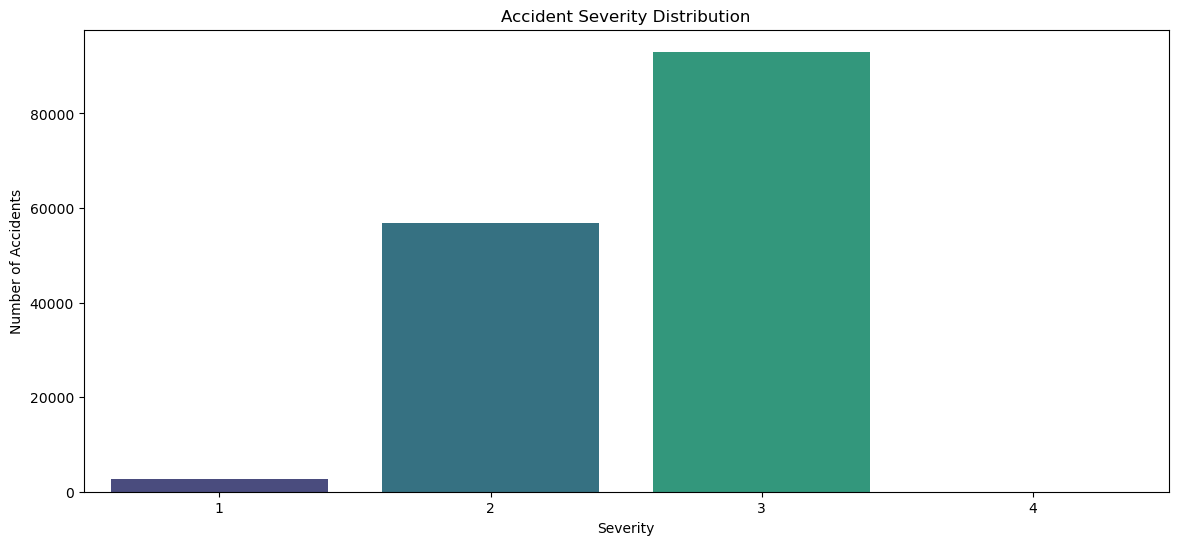

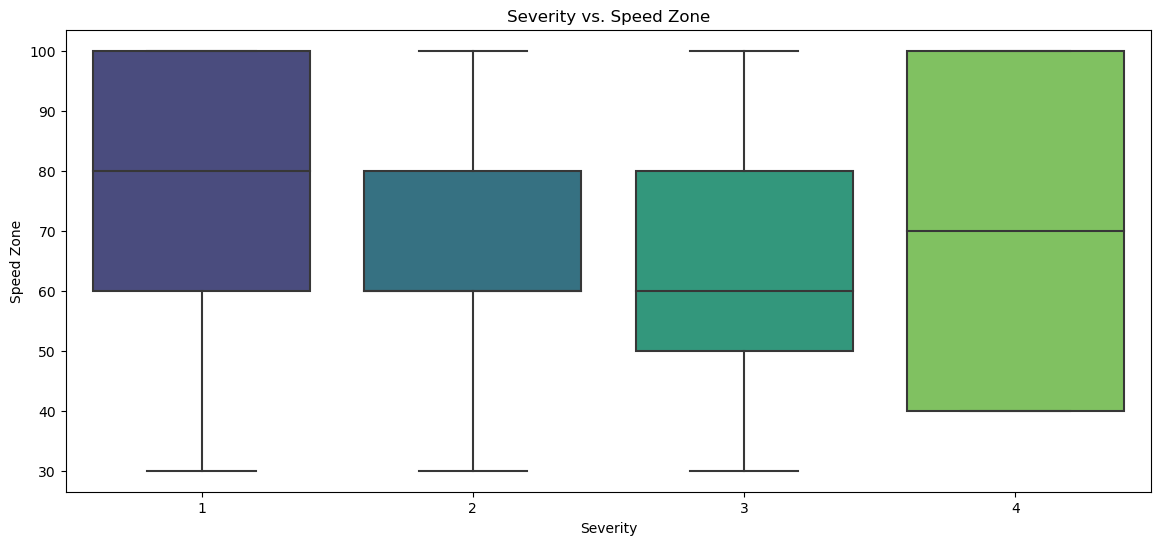

In [13]:
#Severity Analysis
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='SEVERITY', palette='viridis')
plt.title('Accident Severity Distribution')
plt.xlabel('Severity')
plt.ylabel('Number of Accidents')
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='SEVERITY', y='SPEED_ZONE', palette='viridis')
plt.title('Severity vs. Speed Zone')
plt.xlabel('Severity')
plt.ylabel('Speed Zone')
plt.show()

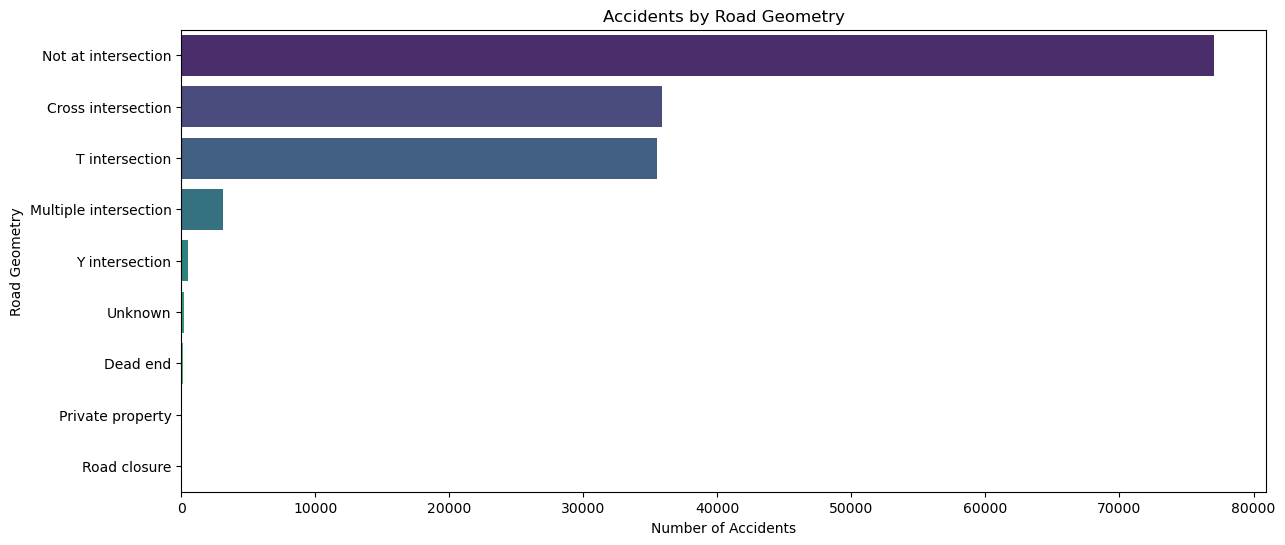

In [14]:
# 3. Geographical Analysis
plt.figure(figsize=(14, 6))
sns.countplot(data=df, y='ROAD_GEOMETRY_DESC', palette='viridis', order=df['ROAD_GEOMETRY_DESC'].value_counts().index)
plt.title('Accidents by Road Geometry')
plt.xlabel('Number of Accidents')
plt.ylabel('Road Geometry')
plt.show()

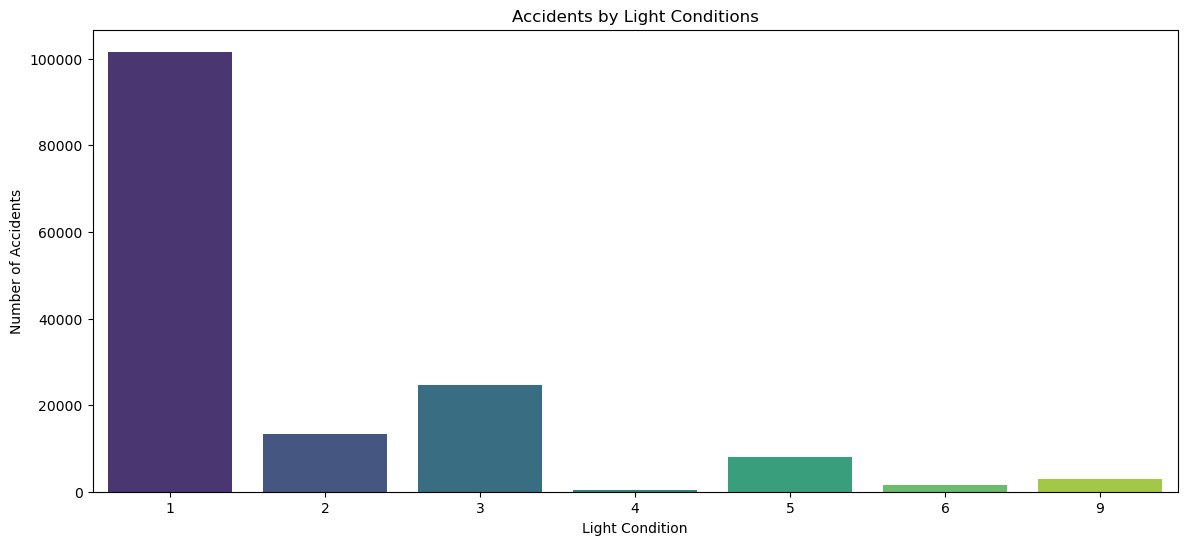

In [15]:
#Impact of different Light Conditions
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='LIGHT_CONDITION', palette='viridis')
plt.title('Accidents by Light Conditions')
plt.xlabel('Light Condition')
plt.ylabel('Number of Accidents')
plt.show()


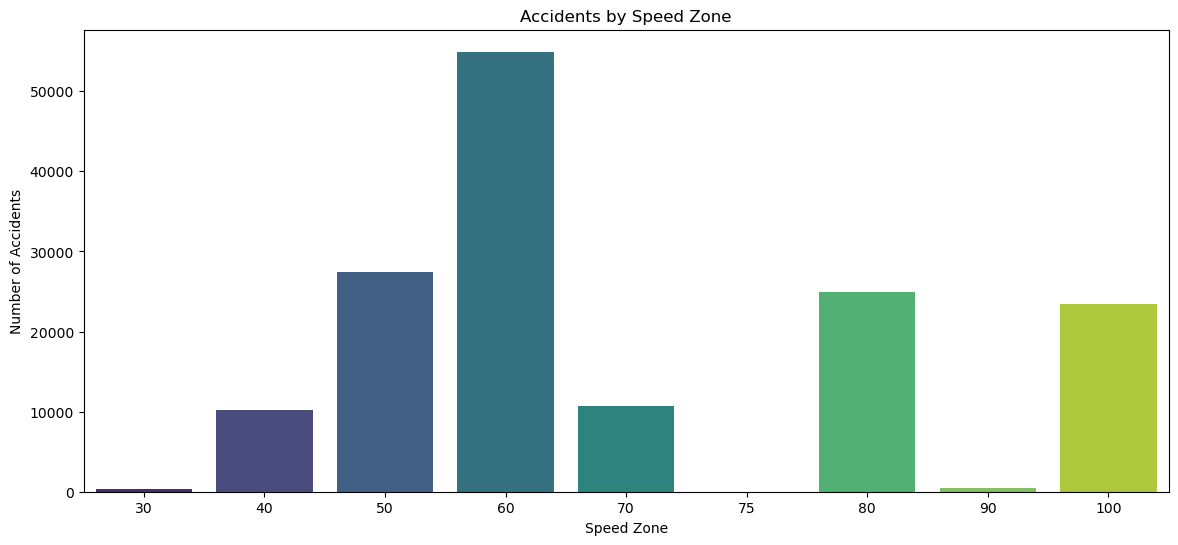

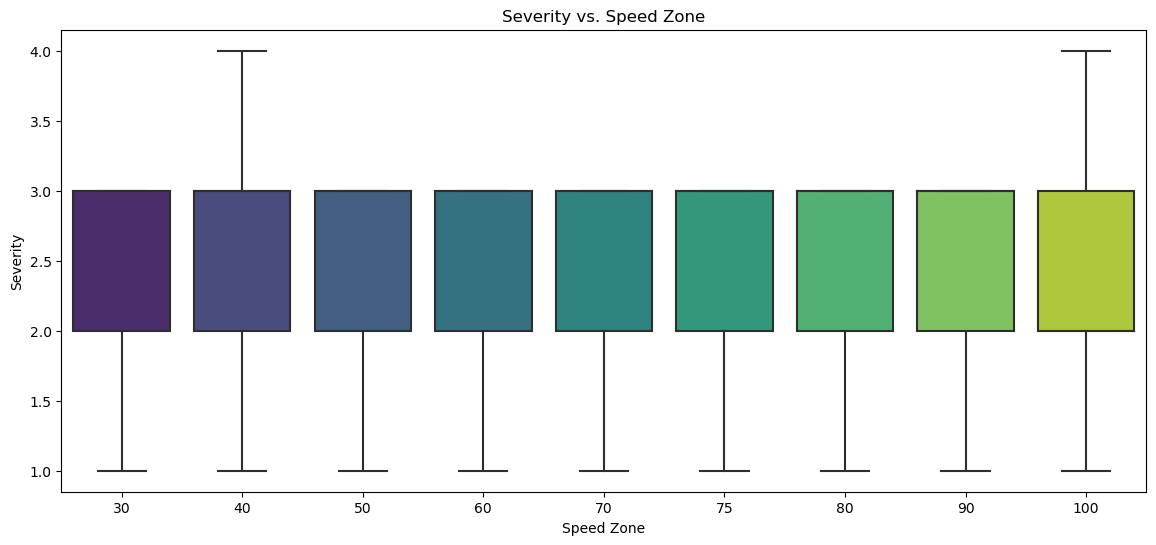

In [16]:
# 5. Speed Zone Analysis
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='SPEED_ZONE', palette='viridis')
plt.title('Accidents by Speed Zone')
plt.xlabel('Speed Zone')
plt.ylabel('Number of Accidents')
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='SPEED_ZONE', y='SEVERITY', palette='viridis')
plt.title('Severity vs. Speed Zone')
plt.xlabel('Speed Zone')
plt.ylabel('Severity')
plt.show()

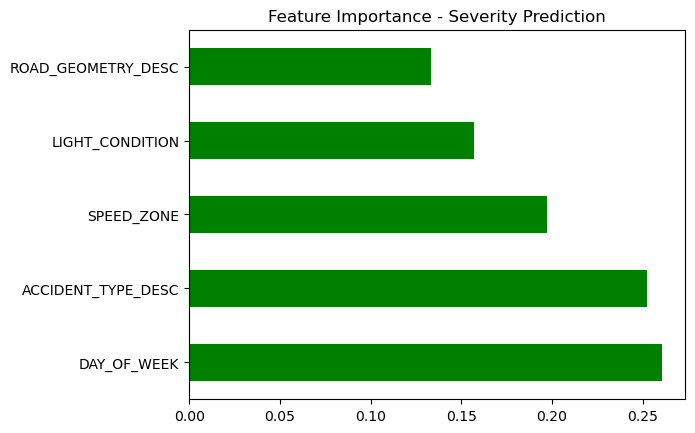

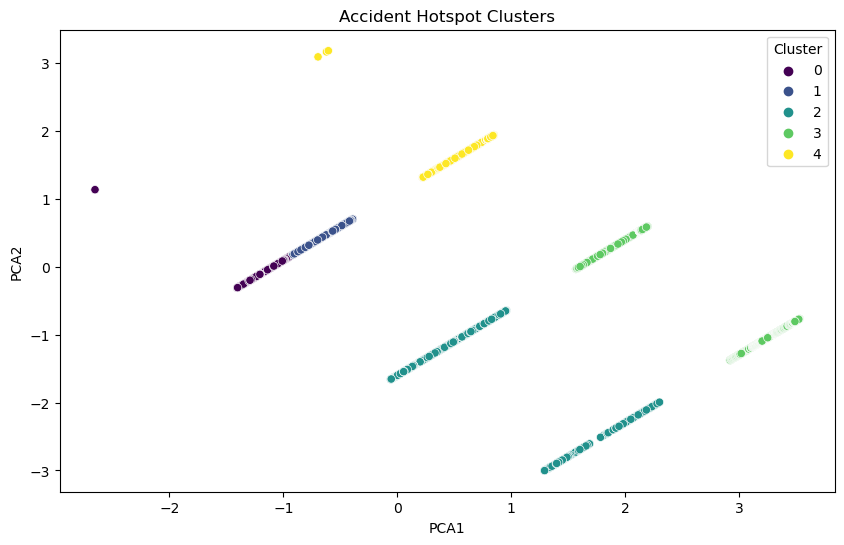

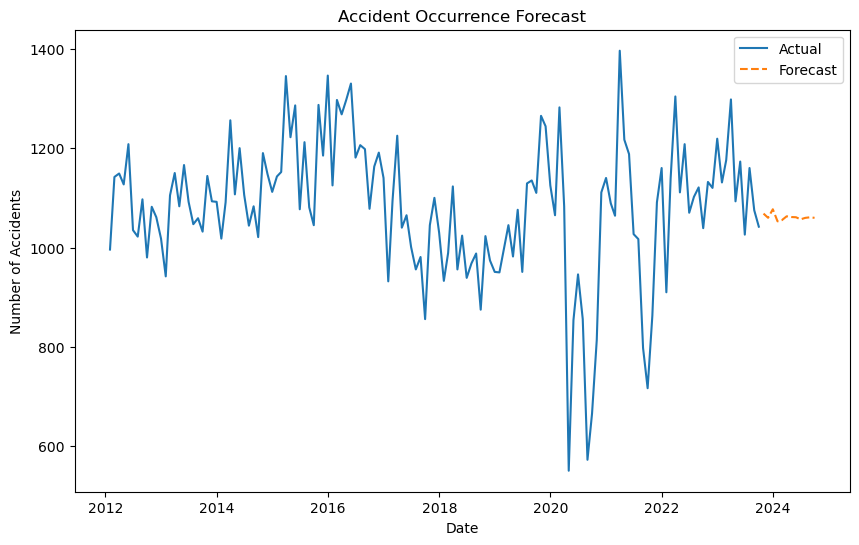

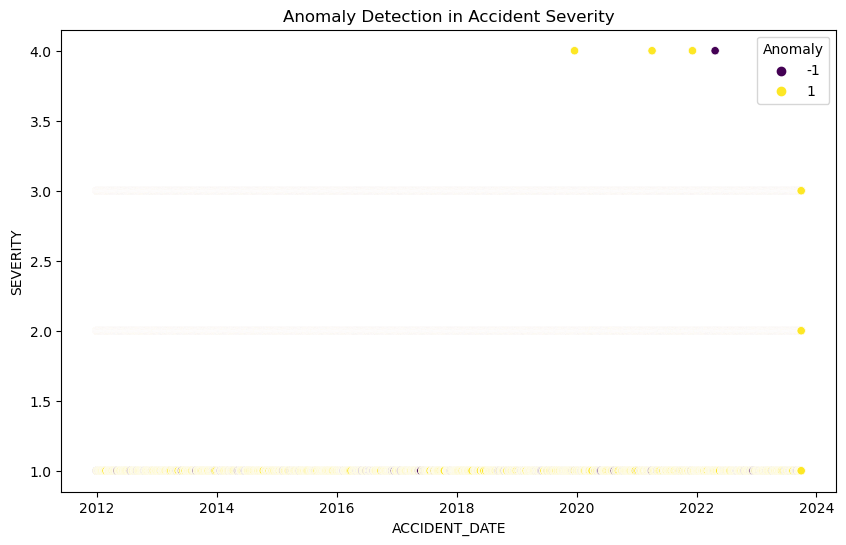

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.arima.model import ARIMA

# Preprocessing steps for machine learning
df_ml = df.copy()

# Encode categorical features
label_encoders = {}
for column in ['ACCIDENT_TYPE_DESC', 'DAY_WEEK_DESC', 'DCA_DESC', 'LIGHT_CONDITION', 'ROAD_GEOMETRY_DESC']:
    le = LabelEncoder()
    df_ml[column] = le.fit_transform(df_ml[column])
    label_encoders[column] = le

# Define features and target for Severity Prediction
X_severity = df_ml[['ACCIDENT_TYPE_DESC', 'DAY_OF_WEEK', 'LIGHT_CONDITION', 'SPEED_ZONE', 'ROAD_GEOMETRY_DESC']]
y_severity = df_ml['SEVERITY']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_severity, y_severity, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Feature importance
feat_importances = pd.Series(rf_model.feature_importances_, index=['ACCIDENT_TYPE_DESC', 'DAY_OF_WEEK', 'LIGHT_CONDITION', 'SPEED_ZONE', 'ROAD_GEOMETRY_DESC'])
feat_importances.nlargest(5).plot(kind='barh', color='green')
plt.title('Feature Importance - Severity Prediction')
plt.show()

# Accident Type Prediction
X_accident_type = df_ml[['DAY_OF_WEEK', 'LIGHT_CONDITION', 'SPEED_ZONE', 'ROAD_GEOMETRY_DESC']]
y_accident_type = df_ml['ACCIDENT_TYPE_DESC']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_accident_type, y_accident_type, test_size=0.3, random_state=42)

# Train model
rf_model.fit(X_train, y_train)

# Clustering Models: Accident Hotspot Identification
# Assuming NODE_ID is the location data
df_cluster = df[['NODE_ID', 'SEVERITY']].dropna()
df_cluster['NODE_ID'] = df_cluster['NODE_ID'].astype(int)

# Standardize the data
scaler = StandardScaler()
X_cluster = scaler.fit_transform(df_cluster)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(X_cluster)

# Visualize clusters
pca = PCA(2)
cluster_pca = pca.fit_transform(X_cluster)
df_cluster['PCA1'] = cluster_pca[:, 0]
df_cluster['PCA2'] = cluster_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_cluster, palette='viridis')
plt.title('Accident Hotspot Clusters')
plt.show()

# Time Series Analysis: Accident Forecasting
df_timeseries = df.copy()
df_timeseries = df_timeseries.set_index('ACCIDENT_DATE')
df_timeseries = df_timeseries.resample('M').size()

# ARIMA model for forecasting
arima_model = ARIMA(df_timeseries, order=(5,1,0))
arima_fit = arima_model.fit()

# Forecasting
forecast = arima_fit.forecast(steps=12)
plt.figure(figsize=(10, 6))
plt.plot(df_timeseries, label='Actual')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.title('Accident Occurrence Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.legend()
plt.show()

# Anomaly Detection: Outlier Identification
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df_ml['Anomaly'] = iso_forest.fit_predict(X_severity)

# Visualizing anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ACCIDENT_DATE', y='SEVERITY', hue='Anomaly', data=df_ml, palette='viridis')
plt.title('Anomaly Detection in Accident Severity')
plt.show()


In [25]:
# Convert ACCIDENT_DATE and ACCIDENT_TIME to datetime
df['ACCIDENT_DATE'] = pd.to_datetime(df['ACCIDENT_DATE'], format='%d/%m/%Y')
df['ACCIDENT_TIME'] = pd.to_datetime(df['ACCIDENT_TIME'], format='%H:%M:%S').dt.time

# Time-Based Features
# Day/Night Indicator
df['HOUR'] = pd.to_datetime(df['ACCIDENT_TIME'], format='%H:%M:%S').dt.hour
df['DAY_NIGHT'] = np.where((df['HOUR'] >= 6) & (df['HOUR'] < 18), 'Day', 'Night')

# Weekend Indicator
df['WEEKEND'] = np.where(df['DAY_WEEK_DESC'].isin(['Saturday', 'Sunday']), 1, 0)

# Time of Day Categories
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['TIME_OF_DAY'] = df['HOUR'].apply(categorize_time)

# Interaction Features
# Light Condition and Road Geometry
df['LIGHT_ROAD_INTERACTION'] = df['LIGHT_CONDITION'].astype(str) + '_' + df['ROAD_GEOMETRY_DESC'].astype(str)

# Speed Zone and Accident Type
df['SPEED_ACCIDENT_INTERACTION'] = df['SPEED_ZONE'].astype(str) + '_' + df['ACCIDENT_TYPE_DESC'].astype(str)

# Derived Severity Levels
# Binary Classification for Severity
df['SEVERITY_BINARY'] = np.where(df['SEVERITY'] > 2, 1, 0)  # 1 for major accidents, 0 for minor

# Geographical Features
# Proximity to Intersection (approximation based on road geometry)
df['PROXIMITY_TO_INTERSECTION'] = np.where(df['ROAD_GEOMETRY_DESC'].str.contains('intersection'), 1, 0)

# Urban vs. Rural Indicator (based on RMA and node ID)
df['URBAN_RURAL'] = np.where(df['RMA'].str.contains('Arterial'), 'Urban', 'Rural')

# Check the new features
print(df.head())


    ACCIDENT_NO ACCIDENT_DATE ACCIDENT_TIME  ACCIDENT_TYPE  \
0  T20120000060    2012-01-01      19:40:00              6   
1  T20120000028    2012-01-01      04:00:00              4   
2  T20120000021    2012-01-01      07:30:00              4   
3  T20120000056    2012-01-01      16:15:00              4   
4  T20120000018    2012-01-01      05:15:00              4   

                  ACCIDENT_TYPE_DESC  DAY_OF_WEEK DAY_WEEK_DESC  DCA_CODE  \
0  Vehicle overturned (no collision)            1        Sunday       184   
1      Collision with a fixed object            1        Sunday       183   
2      Collision with a fixed object            1        Sunday       171   
3      Collision with a fixed object            1        Sunday       183   
4      Collision with a fixed object            1        Sunday       173   

                                           DCA_DESC  LIGHT_CONDITION  ...  \
0           OUT OF CONTROL ON CARRIAGEWAY (ON BEND)                1  ...   
1         

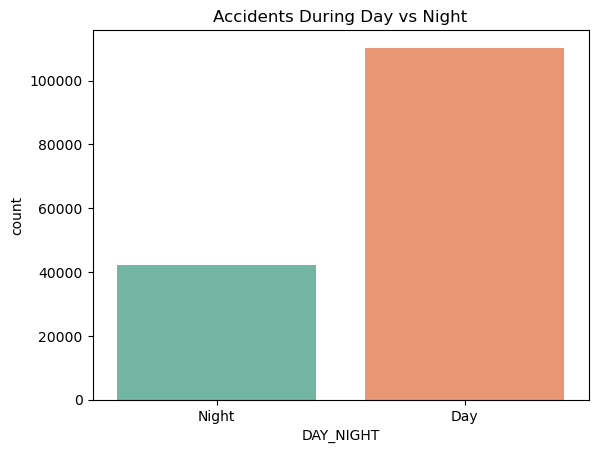

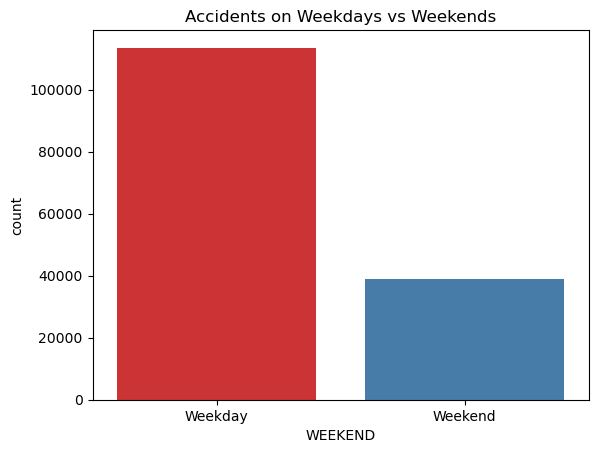

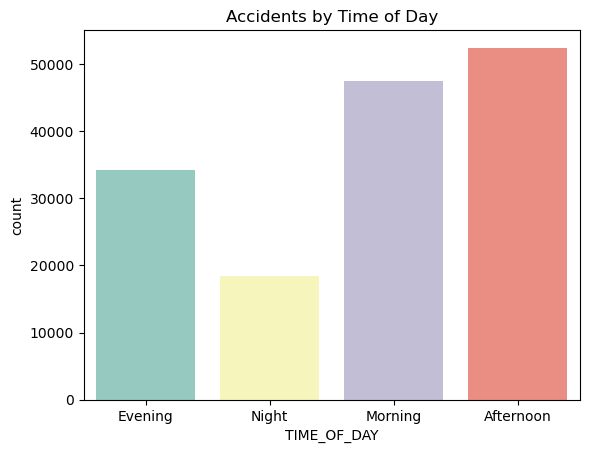

In [26]:
# Day/Night Indicator
sns.countplot(data=df, x='DAY_NIGHT', palette='Set2')
plt.title('Accidents During Day vs Night')
plt.show()

# Weekend Indicator
sns.countplot(data=df, x='WEEKEND', palette='Set1')
plt.title('Accidents on Weekdays vs Weekends')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.show()

# Time of Day Categories
sns.countplot(data=df, x='TIME_OF_DAY', palette='Set3')
plt.title('Accidents by Time of Day')
plt.show()


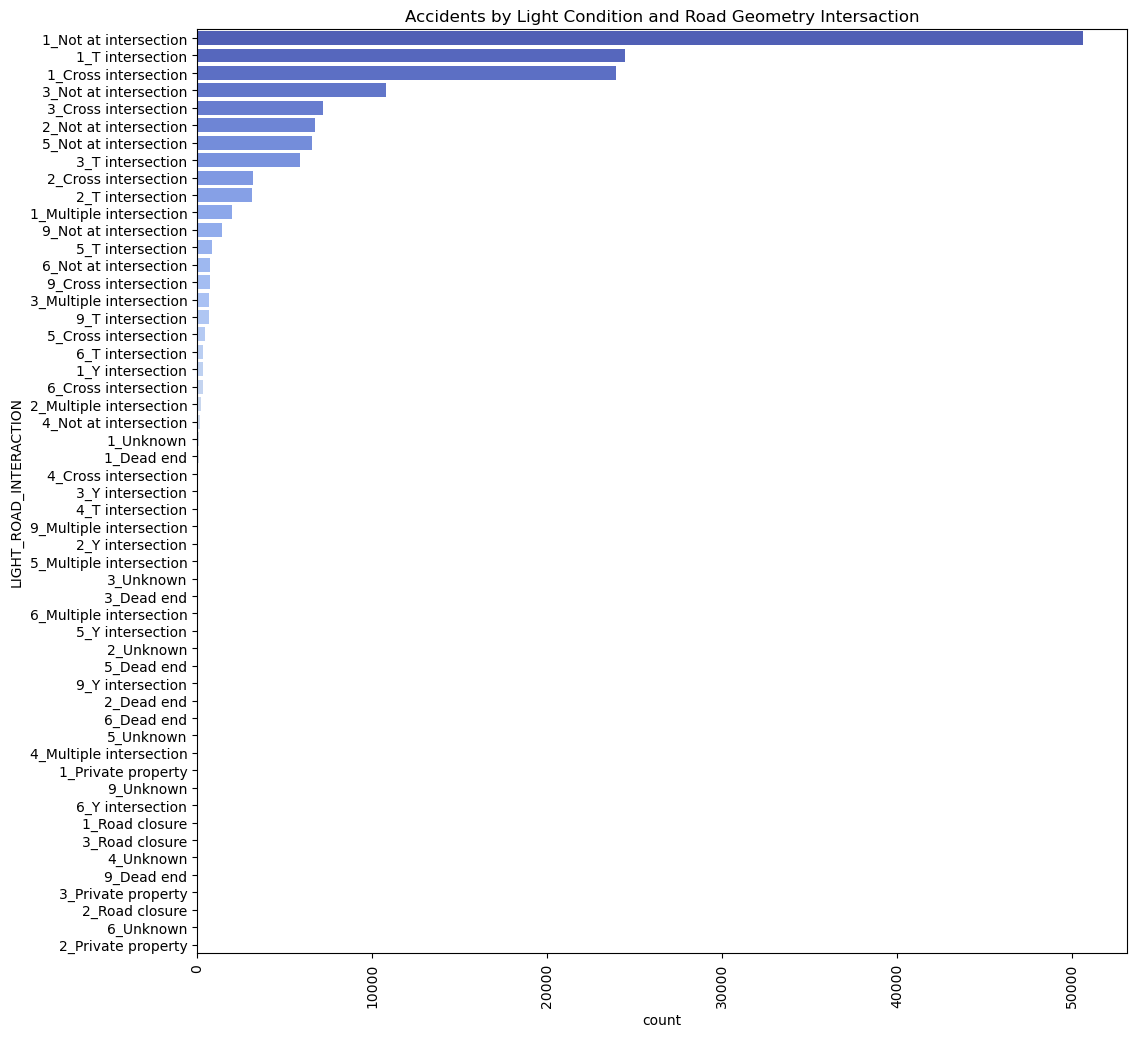

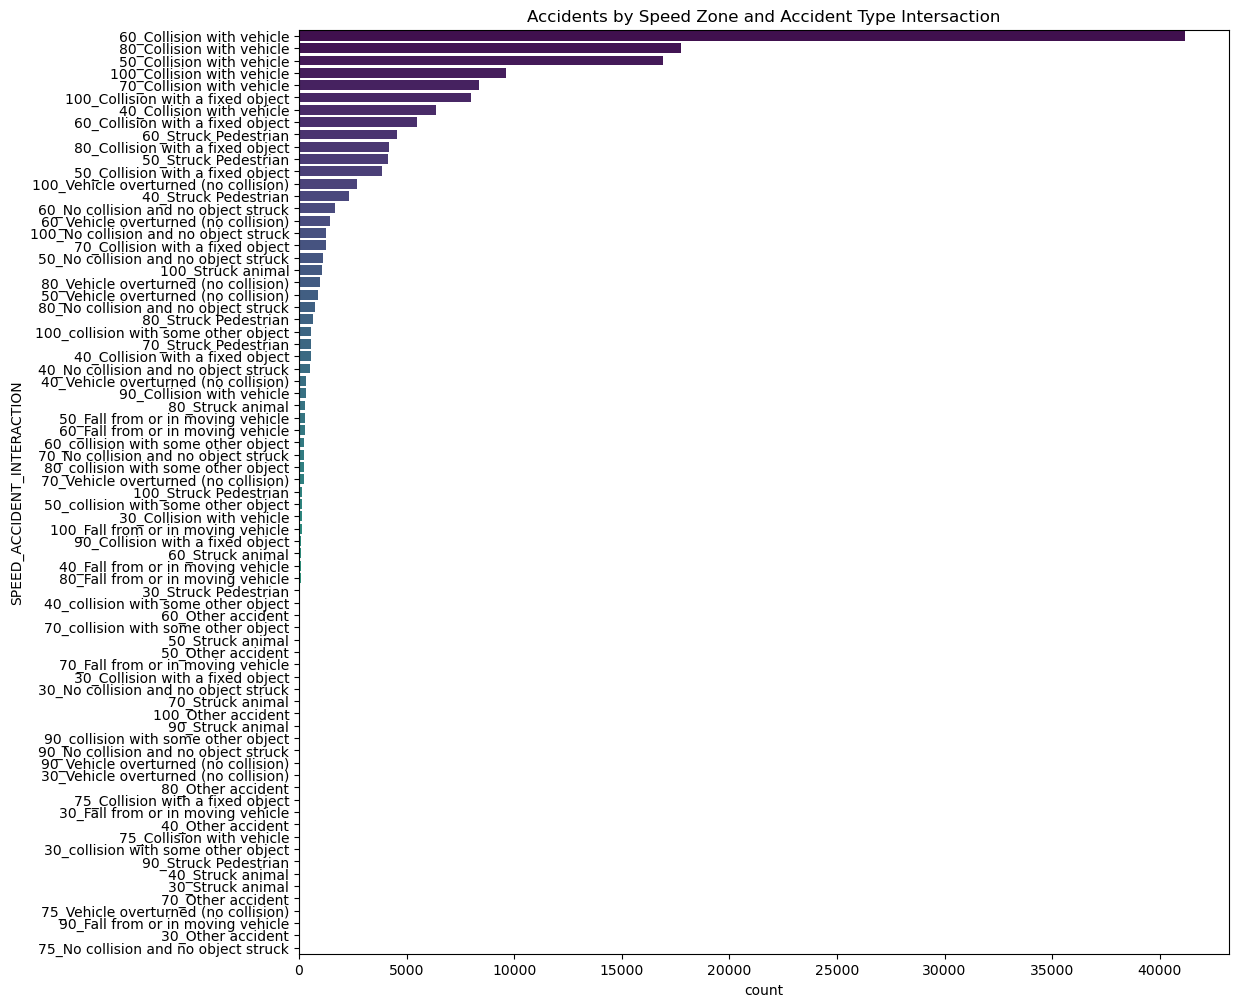

In [33]:
# Light Condition and Road Geometry Intersaction
plt.figure(figsize=(12, 12))
sns.countplot(data=df, y='LIGHT_ROAD_INTERACTION', order=df['LIGHT_ROAD_INTERACTION'].value_counts().index, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Accidents by Light Condition and Road Geometry Intersaction')
plt.show()

# Speed Zone and Accident Type Interaction
plt.figure(figsize=(12, 12))
sns.countplot(data=df, y='SPEED_ACCIDENT_INTERACTION', order=df['SPEED_ACCIDENT_INTERACTION'].value_counts().index, palette='viridis')
plt.xticks(rotation=0)
plt.title('Accidents by Speed Zone and Accident Type Intersaction')
plt.show()


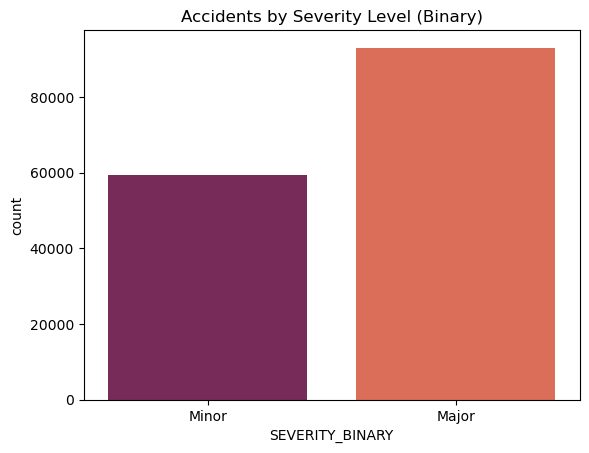

In [28]:
# Binary Classification for Severity
sns.countplot(data=df, x='SEVERITY_BINARY', palette='rocket')
plt.title('Accidents by Severity Level (Binary)')
plt.xticks([0, 1], ['Minor', 'Major'])
plt.show()


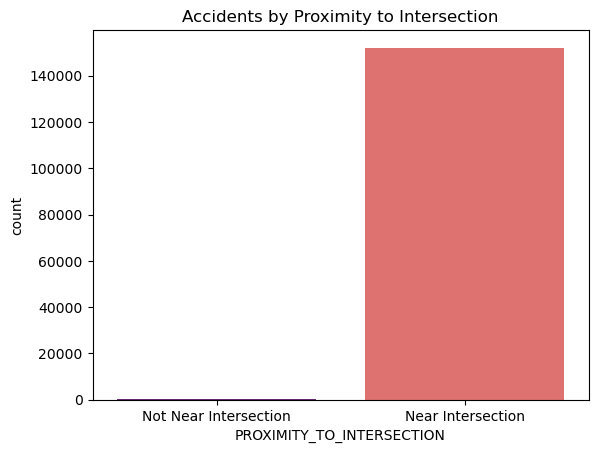

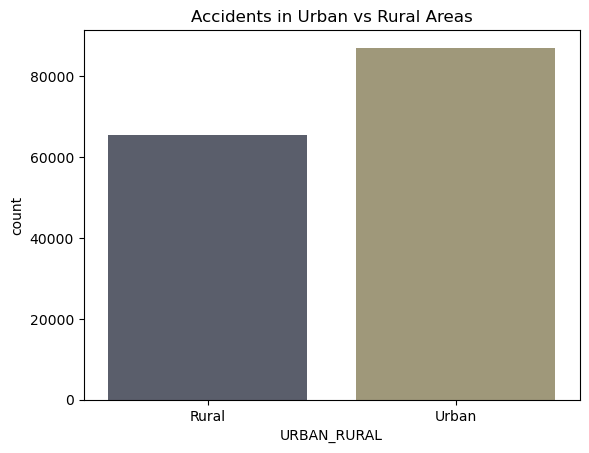

In [29]:
# Proximity to Intersection
sns.countplot(data=df, x='PROXIMITY_TO_INTERSECTION', palette='magma')
plt.title('Accidents by Proximity to Intersection')
plt.xticks([0, 1], ['Not Near Intersection', 'Near Intersection'])
plt.show()

# Urban vs Rural Indicator
sns.countplot(data=df, x='URBAN_RURAL', palette='cividis')
plt.title('Accidents in Urban vs Rural Areas')
plt.show()
